In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 生データ

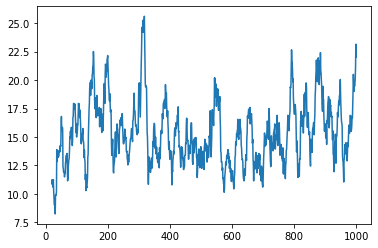

In [55]:
import rpy2.robjects as robjects
samples = [int(20 * np.abs(np.random.normal())) for i in range(1000)]
s = pd.Series(samples)
plt.plot(s.rolling(window=20).mean())

# 平滑化

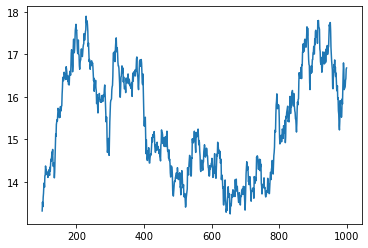

In [57]:
plt.plot(s.rolling(window=100).mean())

# Cubicスプライン with R

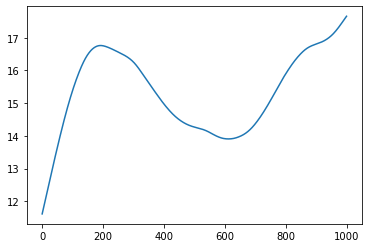

In [73]:
r_y = robjects.FloatVector(samples)
r_x = robjects.FloatVector([i for i in range(len(samples))])

r_smooth_spline = robjects.r['smooth.spline']

kwargs = {"x": r_x, "y": r_y, "lambda":  0.01}
spline1 = r_smooth_spline(**kwargs)
plt.plot(list(spline1[0]), list(spline1[1]))

# Cubicスプライン with scipy

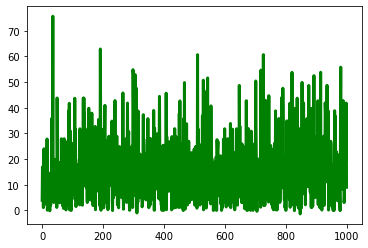

In [66]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = [i for i in range(len(samples))]
spl = UnivariateSpline(x, samples)
spl.set_smoothing_factor(100)
plt.plot(x, spl(x), 'g', lw=3)